# Prerequisites

Before we dive into the project, make sure you have the following prerequisites installed:

* Python (3.6+)
* Jupyter Notebook (optional but recommended for interactive exploration)


#### Importing the Yahoo Finance Package:
We will begin by importing the Yahoo Finance package, which allows us to download daily stock and index prices.

In [4]:
import yfinance as yf

Let's initialize the ticker class and download historical data for the S&P 500 index.

In [5]:
sp500 = yf.Ticker("^GSPC")

In [6]:
sp500 = sp500.history(period="max")

In [7]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,0.0,0.0
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,0.0,0.0
2023-09-14 00:00:00-04:00,4487.779785,4511.990234,4478.689941,4505.100098,3648720000,0.0,0.0


In [8]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-09-05 00:00:00-04:00', '2023-09-06 00:00:00-04:00',
               '2023-09-07 00:00:00-04:00', '2023-09-08 00:00:00-04:00',
               '2023-09-11 00:00:00-04:00', '2023-09-12 00:00:00-04:00',
               '2023-09-13 00:00:00-04:00', '2023-09-14 00:00:00-04:00',
               '2023-09-15 00:00:00-04:00', '2023-09-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24043, freq=None)

The downloaded data is stored in a Pandas DataFrame with columns representing:

* Date: The trading date.
* Open: The opening price.
* High: The highest price during the day.
* Low: The lowest price during the day.
* Close: The closing price.
* Volume: The total trading volume for the day.

<Axes: xlabel='Date'>

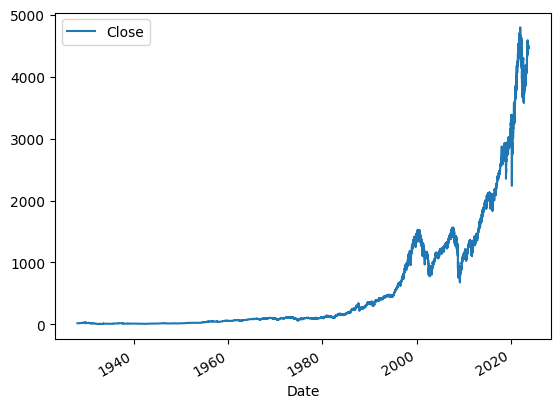

In [9]:
sp500.plot.line(y="Close", use_index=True)

In [10]:
del sp500["Dividends"]
del sp500["Stock Splits"]

Our target variable will indicate whether the S&P 500 index will go up or down on the following trading day. We'll create a column called "Target" with values 1 (up) or 0 (down).

In [11]:
# Create a column for tomorrow's closing price
sp500["Tomorrow"] = sp500["Close"].shift(-1) 

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098
2023-09-14 00:00:00-04:00,4487.779785,4511.990234,4478.689941,4505.100098,3648720000,4450.319824


In [13]:
# Create the target variable (1 if tomorrow's price is higher, 0 if lower)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941,1
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098,1
2023-09-14 00:00:00-04:00,4487.779785,4511.990234,4478.689941,4505.100098,3648720000,4450.319824,0


To avoid outdated data, we'll remove rows prior to January 1st, 1990.

In [15]:
sp500 = sp500.loc["1990-01-01":].copy()

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941,1
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098,1
2023-09-14 00:00:00-04:00,4487.779785,4511.990234,4478.689941,4505.100098,3648720000,4450.319824,0


We'll start by training our machine-learning model using a Random Forest Classifier.

Random forest works by training a bunch of individual decisions with randomized parameters and then averaging the results
they also pick up nonlinear tendencies which works great in terms of stocks

n_estimators is the number of individual decision trees to train the higher the more accurate to a limit
min_samples_split helps protect against overfitting the higher the less accurate 

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close","Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [18]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [19]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [21]:
precision_score(test["Target"],preds)

0.5384615384615384

#### Plotting Price History
Let's visualize the S&P 500 price history by plotting the closing prices against the trading dates.

In [25]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

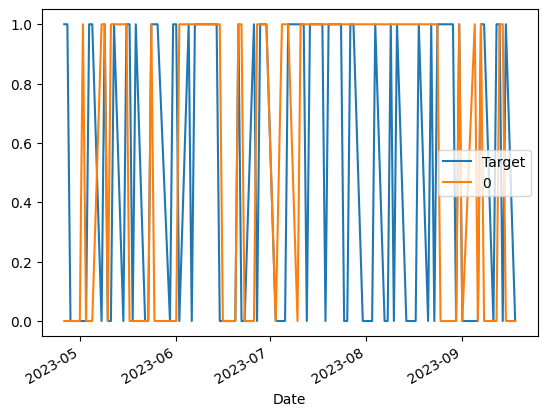

In [27]:
combined.plot()

We will use these functions to perform backtesting, which involves simulating the model's performance on historical data to assess its effectiveness in predicting stock price movements. We will calculate precision scores for the backtest predictions.

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

To test our model over time, we'll implement a backtesting system that simulates trading based on our predictions.

In [30]:
def backtest(data,model, predictors, start=2500,step=250):
    all_predictions=[]

    for i in range(start,data.shape[0],step):
        train = data.iloc[0:i].copy()
        test= data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [31]:
predictions = backtest(sp500, model, predictors)

In [32]:
predictions["Predictions"].value_counts()

Predictions
0    3436
1    2557
Name: count, dtype: int64

In [33]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5287446226046147

In [35]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.533789
0    0.466211
Name: count, dtype: float64

In [37]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [39]:
sp500 = sp500.dropna()

In [40]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902,0,1.003350,2.0,1.003529,2.0,1.005383,30.0,1.095670,120.0,1.160684,530.0
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941,1,0.997144,1.0,0.999374,2.0,0.999522,29.0,1.088867,120.0,1.153634,530.0
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098,1,1.000620,1.0,1.000527,3.0,1.000547,30.0,1.089664,120.0,1.154626,531.0


In [51]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

We apply a threshold of 0.6 to these predicted probabilities (preds). If the probability of class 1 is greater than or equal to 0.6, we set the prediction to 1; otherwise, set it to 0.

In [52]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds>=.6] =1
    preds[preds< .6]=0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [53]:
predictions = backtest(sp500, model, new_predictors)

In [54]:
predictions["Predictions"].value_counts()

Predictions
0.0    4170
1.0     822
Name: count, dtype: int64

In [55]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5693430656934306